#### Day1. OpenCV입문

#### 00. OpenCV 임포트

In [14]:
import cv2

In [15]:
cv2.__version__    # 버전 확인

'4.1.0'

#### 01. OpenCV 기초 사용법

In [24]:
img = cv2.imread('./data/lenna.bmp')    # 이미지 불러오기
print(type(img), img.shape)             # 이미지의 데이터 타입과, 크기

cv2.namedWindow("image")                # 윈도우 생성
cv2.imshow("image", img)                # 윈도우에 불러온 이미지를 보여줌

# 종료 조건
cv2.waitKey()                           # 아무키나 입력 받으면
cv2.destroyAllWindows()                 # 모든 윈도우를 소멸

<class 'numpy.ndarray'> (512, 512, 3)


**Workshop : 영상 파일 저장**

1. './data/lena.jpg' 파일을 읽어 들여서 bmp파일 형식의 './out/lena.bmp'로 저장
2. './data/lena.jpg' 파일을 읽어 들여서 png파일 형식의 './out/lena.png'로 저장
3. './data/lena.jpg' 파일을 읽어 들여서 png파일 형식의 './out/lena2.png'로 저장(단, 압축률 90% 적용)
4. './data/lena.jpg' 파일을 읽어 들여서 jpg파일 형식의 './out/lena2.jpg'로 저장(단, 압축률 50% 적용)

*Hint*

```py
cv2.imread(읽을 파일명, 읽을 모드(ex. 회색 또는 컬러)

cv2.imwrite(저장할 파일명, 이미지데이터)                                        # 압축률 없이 그대로 저장
cv2.imwrite(저장할 파일명, 이미지데이터, [cv2.IMWRITE_PNG_COMPRESSION, 0~9])    # 0~9 압축률로 저장 (png)
cv2.imwrite(저장할 파일명, 이미지데이터, [cv2.IMWRITE_JPEG_QUALIT, 0~100])      # 0~100 압축률로 저장 (jpeg)
```

In [28]:
# Color mode로 읽기
img = cv2.imread('./data/lenna.bmp')    # 이미지 불러오기

# Grayscale mode로 읽기
# img = cv2.imread('./data/lena.bmp', cv2.IMREAD_GRAYSCALE) # flag : cv2.IMREAD_GRAYSCALE

In [29]:
cv2.imwrite('./out/lena.bmp', img)                                       # 1.
cv2.imwrite('./out/lena.png', img)                                       # 2.
cv2.imwrite('./out/lena2.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 9])    # 3.
cv2.imwrite('./out/lena2.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 50])      # 4.

True

**Workshop L matplotlib 컬러영상 표시**
1. openCV를 이용, './data/lena.jpg' 파일을 읽어 들인 후 matplotlib.pyplot의 imshow()함수를 사용해 화면에 표시.
* 결과 확인 : **RGB가 반대로 보이는 현상**

2. 1번 과정의 문제를 해결하기(내부 함수 이용)
* 표시된 결과가 원본과 동일한 색조가 되도록 변환 후 화면에 표시

3. 1번 과정 문제를 해결하기(numpy 이용)
* numpy ndarray의 색인 문법으로 컬러 채널의 순서를 변경

In [30]:
import matplotlib.pyplot as plt

(512, 512, 3)


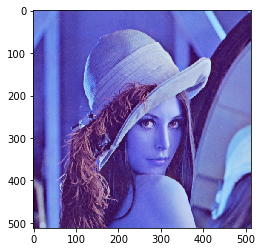

In [32]:
# 1.
img_path = './data/lena.jpg'
img = cv2.imread(img_path)

print(img.shape)

plt.imshow(img)

* RGB값이 반전되어 표시
    * 이유 : img에는 BGR의 순서로 데이터가 준비되어 있음.
    * 해결방법 1. : openCV의 **cvtColor** 함수를 사용해서 BGR -> RGB로 변환
    ```py
    변수 = cv2.cvtColor(바꿀 이미지 변수, cv2.COLOR_BGR2RGB)    # cv2.COLOR_BGR2RGB : BGR 순서로 저장되어 있던 값을 RGB 순서로 바꿈
    ```
    * 해결방법 2. : numpy ndarray의 **색인문법**을 사용하여 컬러 채널의 순서를 변경
    ```py
    img_rgb2 = img[...,::-1]    # ...은 특정행이나 열을 한꺼번에 가져오는 것(Info by 재희님)
    ```

(512, 512, 3)


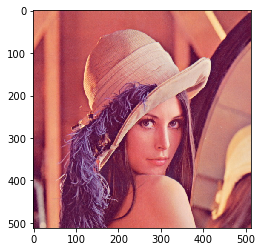

In [34]:
#2
img = cv2.imread(img_path)                        # img에는 BGR 순서로 데이터 저장
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # convert 함수에 의해서 데이터 순서를 바꿔줌

print(img_rgb.shape)

plt.imshow(img_rgb)                               # matplotlib는 데이터를 RGB 순서로 읽어들임

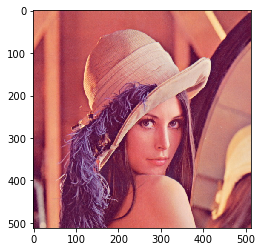

In [35]:
# 3-1. 값 교환 알고리즘 사용

img = cv2.imread(img_path)    # img에는 BGR 의 순서로 데이터가 준비되어 있음

# TODO
# numpy ndarray의 색인 문법으로 컬러 채널의 순서를 변경

# option 1
change = img[:,:,0].copy()    # b channel -> change
img[:,:,0] = img[:,:,2]       # r channel -> b channel
img[:,:,2] = change           # change -> r channel
plt.imshow(img)

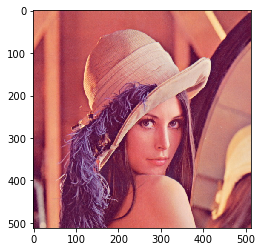

In [36]:
# 3-2. 리스트 특성 활용

img = cv2.imread(img_path)     # img에는 BGR 순서로 데이터 저장

# TODO
# numpy ndarray의 색인 문법으로 컬러 채널의 순서를 변경

# option 2
img3 = img[...,::-1]          #  ...은 특정행이나 열을 한꺼번에 가져오는 것 (by 재희)

plt.imshow(img3)

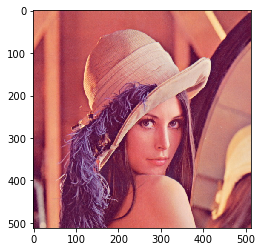

In [37]:
# 3-3. Numpy ndarray의 특성 활용 1.

img = cv2.imread(img_path)       # img에는 BGR 순서로 데이터 저장

# TODO
# numpy ndarray의 색인 문법으로 컬러 채널의 순서를 변경

# option 3
img[:,:,[0,2]]=img[:,:,[2,0]]    # 

plt.imshow(img)

(512, 512, 3)


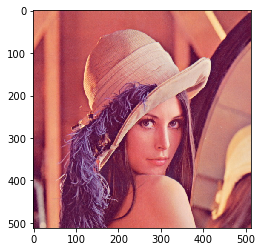

In [38]:
# 3-4. Numpy ndarray의 특성 활용 2.

img = cv2.imread(img_path)         # img에는 BGR 순서로 데이터 저장
print(img.shape)                   # 

# option 4
img_convert = img.copy()
img_convert[:,:,0] = img[:,:,2]    # 
img_convert[:,:,2] = img[:,:,0]
plt.imshow(img_convert)

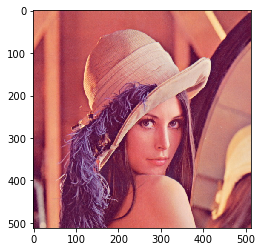

In [39]:
# 3-5. Numpy ndarray의 특성 활용 3.

img = cv2.imread(img_path)     # img에는 BGR 순서로 데이터 저장

# option 5
plt.imshow(img[:,:,-1::-1])    # 

#### 02. 행렬 연산(Numpy)

In [40]:
import numpy as np

> 1. 행렬의 생성과 초기화

행렬을 생성하는 방법
1. np.empty
2. np.zeros
3. np.ones
4. np.full
5. np.array()

In [41]:
l = [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12]]    # python list

mat = np.array(l)        # numpy ndarray
mat

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [42]:
# 색인(index) : 어떤 지점을 찾아가는 방법
# mat에서 2만 100으로 바꾸고 싶다면
mat[0, 1] = 100
mat

array([[  1, 100,   3,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11,  12]])

In [43]:
# 슬라이싱(slicing) : ~부타 ~까지 부분을 찾아가는 방법
# mat에서 마지막행(9~12) 값 모두를 200으로 바꾸고 싶다면
mat[2, :] = 200
mat

array([[  1, 100,   3,   4],
       [  5,   6,   7,   8],
       [200, 200, 200, 200]])

> 2. 행렬의 복사

In [44]:
img1 = cv2.imread("./data/cat.bmp")

img2 = img1            # 치환
img3 = img1.copy()     # 복사

img1[:, :] = (0, 255, 255) 

# B=0, G=255, R=255
# green + red = yellow

cv2.imshow("img2", img2)
cv2.imshow("img3", img3)

cv2.waitKey()
cv2.destroyAllWindows()

> 3. 행렬 원소값 참조

In [45]:
np.arange(12).reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
# mat2에 "mat1의 모든 값에 10씩을 더해서" 넣기

mat1 = np.arange(12).reshape(3,4)
mat2 = np.zeros(mat1.shape, type(mat))
mat2

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=object)

In [50]:
# 파이썬 방식
h, w = mat1.shape # (3, 4)
for j in range(h):
    for i in range(w):
        mat2[j, i] = mat1[j, i] + 10
mat2

array([[10, 11, 12, 13],
       [14, 15, 16, 17],
       [18, 19, 20, 21]])

In [48]:
# 넘파이 방식
mat2 = mat1 + 10 # broadcasting
mat2

array([[10, 11, 12, 13],
       [14, 15, 16, 17],
       [18, 19, 20, 21]])

> 4. 행렬 연산

In [52]:
mat1 = np.ones((3, 4), np.int32)
mat2 = np.arange(12).reshape(3,4)

mat3 = mat1 + mat2
mat4 = mat2 * 2     # broadcasting

In [53]:
mat3, mat4

(array([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]]),
 array([[ 0,  2,  4,  6],
        [ 8, 10, 12, 14],
        [16, 18, 20, 22]]))

**Broadcasting**
* Numpy의 유용한 기능 중 하나
    * 원래 프로그램에서 각 행렬의 일괄적인 상수의 연산을 진행하려면 굉장히 복잡
    * 브로드캐스팅은 방송처럼 행렬 모든 원소에 동일한 연산을 진행
* 이 기능이 딥러닝에서 매우 유용하게 쓰임

**Workshop : 액자 프레임 만들기**

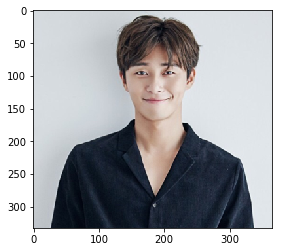

In [54]:
img = plt.imread('./data/psj.png')
plt.imshow(img)

In [55]:
print(type(img), img.shape) # shape에서 채널이 4개가 나온 이유 : R, G, B 외에 alpha 채널이 더 있기 떄문

<class 'numpy.ndarray'> (333, 365, 4)


In [56]:
# 좌상단의 첫번째 픽셀의 R, G, B, alpha
# 255로 나누어 정규화 된 상태
# 0이 최소값, 1이 최대값
img[0, 0] 

array([0.83137256, 0.8509804 , 0.8666667 , 1.        ], dtype=float32)

In [57]:
img[0, 0, 0]   # R channel의 밝기(광도, intensity)값

0.83137256

In [58]:
img[0, 0, 1]   # G channel의 밝기(광도, intensity)값

0.8509804

In [59]:
img[0, 0, 2]   # B channel의 밝기(광도, intensity)값

0.8666667

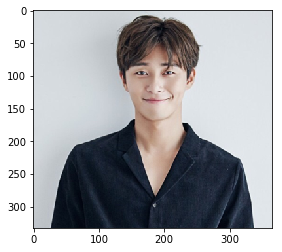

In [60]:
img = plt.imread('./data/psj.png')

# 좌상단의 첫번째 픽셀을 빨간색으로 변경
img[0, 0, 0] = 1
img[0, 0, 1] = 0
img[0, 0, 2] = 0

plt.imshow(img)   # 한픽셀이 너무 작아서 확인 불가

In [61]:
# 범위로 슬라이싱

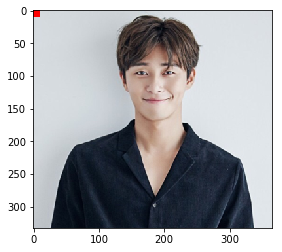

In [62]:
img = plt.imread('./data/psj.png')
img[0:10, 0:10, 0] = 1
img[0:10, 0:10, 1] = 0
img[0:10, 0:10, 2] = 0
plt.imshow(img)

In [63]:
img.shape[1]

365

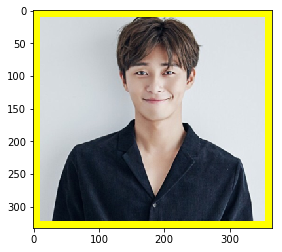

In [64]:
img = plt.imread('./data/psj.png')

#상단 가로
img[0:10, :] = [1, 1, 0, 1] # R:1, G:1, B:0, alpha:1

#좌측 세로
img[:, 0:10] = [1, 1, 0, 1] # R:1, G:1, B:0, alpha:1

#우측 세로
img[:, img.shape[1]-10:] = [1, 1, 0, 1] # R:1, G:1, B:0, alpha:1

#하단 가로
img[img.shape[0]-10:, :] = [1, 1, 0, 1] # R:1, G:1, B:0, alpha:1

plt.imshow(img)

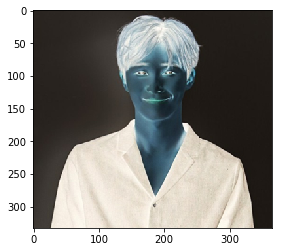

In [65]:
# 반전
img = plt.imread('./data/psj.png')

# option 1
img[:, :, :3] = 1 - img[:, :, :3]

plt.imshow(img)

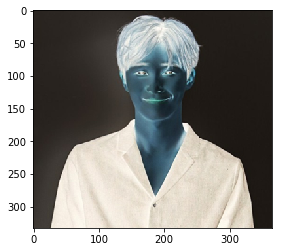

In [66]:
# option 2
img = plt.imread('./data/psj.png')
img = np.abs(1 - img[:,:])
img[:,:,3] = 1
plt.imshow(img)

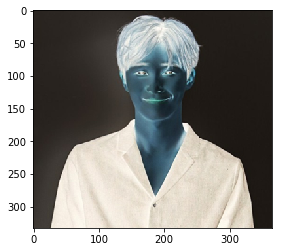

In [67]:
# option 3
img = plt.imread('./data/psj.png')
img3 = img.copy()
img3 = abs(img3-1)
img3[:,:,3] = img[:,:,3]
plt.imshow(img3);


#### 03. 동영상 파일 다루기

> 1. 카메라 입력

In [69]:
# cap = cv2.VideoCapture(device) # 카메라 디바이스, 
# cap = cv2.VideoCapture(file_path) # 동영상 파일
# cap = cv2.VideoCapture(url) # 스트리밍 주소 

In [70]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Camera open failed!!")
    sys.exit()

while True:                            # 무한반복에서는 반드시 break문 있어야 함!!

    ret, frame = cap.read()             # frane : 이미지 1장
    
    if not ret:
        print("frame read error")
        break;
        
    cv2.imshow("frame", frame)

    if cv2.waitKey(10) == ord('q'):     # cv2.waitKey(10) : 10ms 를 기다리기, Sleep효과
                              # 27 : ESC Key 
        break;

if cap.isOpened():
    print("cap released")
    cap.release()        
cv2.destroyAllWindows() 

cap released


동영상 파일 : ./data/stopwatch.avi
* 윈도우에 재생
* 반전해서도 표시